# Part 1: Data Exploration
## Data Summary

This data set contains statistics, in arrests per 100k for assault, murder, and rape in each of the 50 US states in the year 1973. Also given is the percent of the population living in urban areas.

A data frame has 50 observations(states) on 3 variables(murder, assault, rape).


In [1]:
# import the pandas library
import pandas as pd 
# import the seaborn library
import seaborn as sns 
# import the numpy library
import numpy as np
# import the statsmodels library
import statsmodels.api as sm

In [2]:
# import the 'US_violent_crime.csv' to a df variable
df = pd.read_csv('US_violent_crime.csv')   
# view 5 random rows to get a snapshot of the dataframe 
df.sample(n=5)  

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
18,Maine,2.1,83,51,7.8
30,New Mexico,11.4,285,70,32.1
11,Idaho,2.6,120,54,14.2
27,Nevada,12.2,252,81,46.0
6,Connecticut,3.3,110,77,11.1


In [3]:
#find the number of columns and rows of the df
df.shape 

(50, 5)

In [4]:
# rename the 'unnamed: 0' column to 'State'
df = df.rename({'Unnamed: 0': 'State'}, axis=1)
# view 5 random rows to see the change in column name
df.sample(n=5)  

,State,Murder,Assault,UrbanPop,Rape
16,Kentucky,9.7,109,52,16.3
26,Nebraska,4.3,102,62,16.5
37,Pennsylvania,6.3,106,72,14.9
47,West Virginia,5.7,81,39,9.3
1,Alaska,10.0,263,48,44.5


In [5]:
# look at the summary table of the df
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [6]:
# finding out if there are any null values
df.isnull().sum()    

State       0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

## Analyzing the Features

Here we are going to show the boxplot of all features relative to each other.

In [7]:
# import the matplotlib library
import matplotlib.pyplot as plt    

### BoxPlot
From this we can get a good visual representation of what features carry the most weight. Below we can see that Assaults make up a majority of the crimes.

<AxesSubplot:>

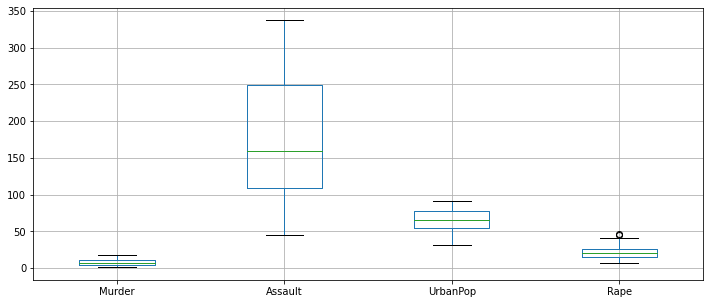

In [8]:
df.boxplot(column=['Murder', 'Assault', 'UrbanPop', 'Rape'], grid=True, figsize=(12,5), layout=None)

The 'Murder', 'UrbanPop', 'Rape', max, min, median and quartile all fall below 100. Assault max, min, and median have the highest rates. Within 'Assault' the bulk of instances committed occur between 160 and 250 per 100k. 

## Histograms of Each Feature

Here we plot each feature in a histogram. 

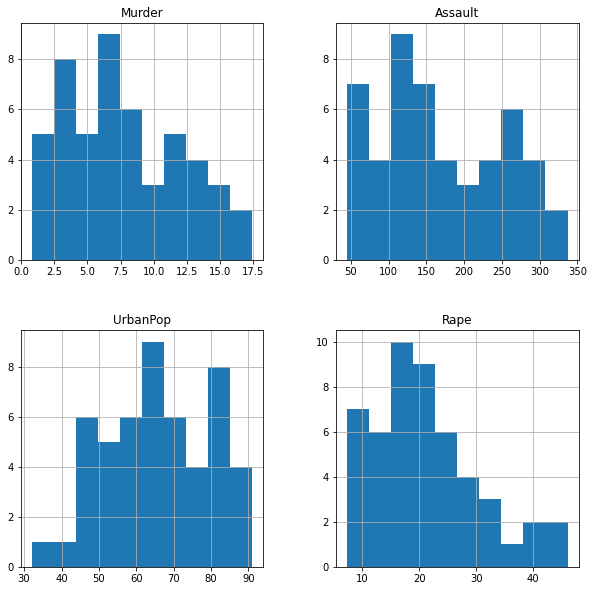

In [9]:
df.hist(figsize=(10,10));

In [10]:
df1 = df.drop(['State'], axis=1)

## Heatmap of the Dataframe

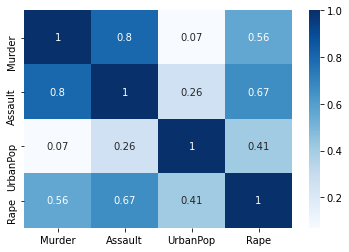

In [11]:
sns.heatmap(df1.corr(), annot=True,cmap="Blues");

First, lets make an assumption. Does the Urban Population density correlate to crime rates. For example, if the UrbanPop is high does that mean that the specific types of crimes rates will be high? 

According to this heat map we don't see a significant correlation between UrbanPop and the 3 types of crimes.  Look at the correlation coefficients. UrbanPop/Rape = 0.41, UrbanPop/Assault = 0.26, UrbanPop/Murder = 0.07, all of which show low significance, especially UrbanPop and Murder. 

Next, we will plot the data on scatterplots in order to see this same idea visualized differently. 

## Scatter Plots

Here we are going to create scatterplots for each feature in relation to the Urban Population(UrbanPop)

These will give us another visual representation of feature significance

### Assault Scatterplot

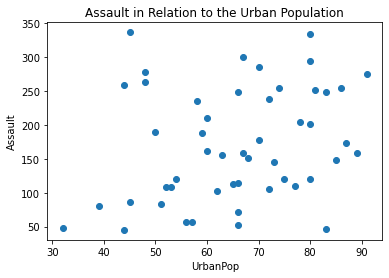

In [12]:
plt.scatter(df['UrbanPop'], df['Assault']);
plt.title('Assault in Relation to the Urban Population')
plt.xlabel('UrbanPop')
plt.ylabel('Assault')
plt.show()

According to the heatmap, the correlation coefficient was 0.26, which is low. We can see by this scatterplot that as the population increases the rate of assaults don't really increase. It's only slight at best. 

### Murder Scatterplot

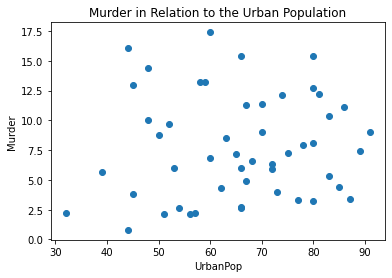

In [13]:
plt.scatter(df['UrbanPop'], df['Murder']);
plt.title('Murder in Relation to the Urban Population')
plt.xlabel('UrbanPop')
plt.ylabel('Murder')
plt.show()

The correlation coeffiecient was lowest for the Murder feature at 0.07. Clearly, in this scatterplot, there isn't any similarity between the two. 

### Rape Scatterplot

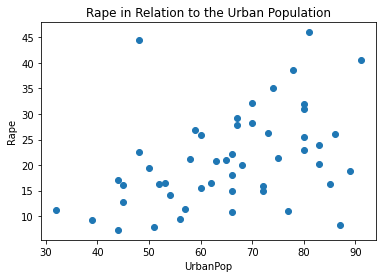

In [14]:
plt.scatter(df['UrbanPop'], df['Rape']);
plt.title('Rape in Relation to the Urban Population')
plt.xlabel('UrbanPop')
plt.ylabel('Rape')
plt.show()

The heatmap showed that the highest correlation coefficient, 0.41, was with the Rape crime rate. Here, we can finally see a slight relationship between the two features, with the population increase, the rate of Rape increases somewhat. 

## Pie Chart

In [15]:
# For the pie chart we need to find the basic statistical variables. 
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


### First we start with the MAX values for each feature

For the pie chart we will use the max values found in the describe function. They are 17.4, 337, 91, 46. 

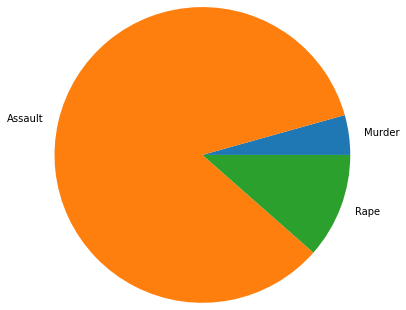

In [16]:
y = np.array([17.4, 337, 46])  # max values from the describe table
mylabels = ['Murder', 'Assault', 'Rape']
plt.pie(y, labels = mylabels, radius=1.7);

The pie chart is simple. Assaults make up the majority of crimes committed. 

From this, lets make another hypothesis. 

Does the rate of assault correlate to the rate of Murder and Rape?

According to the heatmap, the highest correlation coefficient is .80 between 'Murder' and 'Assault'. The second highest correlation coefficient, 0.67, is between 'Assault' and 'Rape'. 


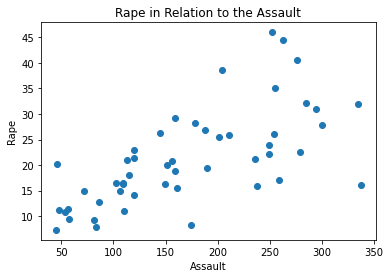

In [17]:
plt.scatter(df['Assault'], df['Rape'])
plt.title('Rape in Relation to the Assault')
plt.xlabel('Assault')
plt.ylabel('Rape')
plt.show()


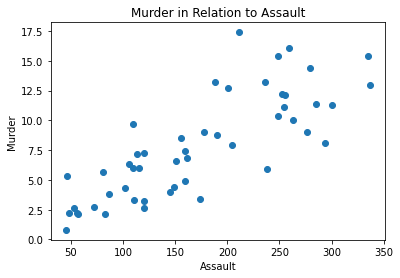

In [18]:
plt.scatter(df['Assault'], df['Murder'])
plt.title('Murder in Relation to Assault')
plt.xlabel('Assault')
plt.ylabel('Murder')
plt.show()

Here, we can see that the higher the Assaults that are committed, the higher the number of Rape crimes.  

## Linear Regression

Next, we will plot a linear regression line for the 'Assault' and 'Rape' variables.

In [19]:
df1 = df.copy()    # making a copy of the first dataframe

In [20]:
# lets drop the 'State', 'Murder', and 'UrbanPop' from the new dataframe and leave just the two features we want
# which are 'Assault' and 'Rape'

df1 = df1.drop(df1[['State', 'Murder', 'UrbanPop']], axis=1)
df1.head()

,Assault,Rape
0,236,21.2
1,263,44.5
2,294,31.0
3,190,19.5
4,276,40.6


In [21]:
y = df1['Rape'] # dependant variable
x1 = df1['Assault']  # independant variable

### Rape/Assault Regression

In [22]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rape   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     38.11
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           1.36e-07
Time:                        11:16:44   Log-Likelihood:                -167.69
No. Observations:                  50   AIC:                             339.4
Df Residuals:                      48   BIC:                             343.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.4648      2.297      3.685      0.001       3.846      13.083
Assault        0.0748      0.012      6.173      0.000       0.050       0.099
==============================================================================
Omnibus:                        3.900   Durbin-Watson:                   1.871
Prob(Omnibus):                  0.142   Jarque-Bera (JB):                2.889
Skew:                           0.411   Prob(JB):                        0.236
Kurtosis:                       3.844   Cond. No.                         436.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

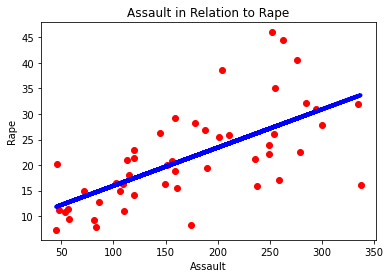

In [23]:
plt.scatter(x1,y, c='red')
yhat = 0.0748 * x1 + 8.4648
fig = plt.plot(x1, yhat, lw=4, c='blue', label='Regression Line')
plt.title('Assault in Relation to Rape')
plt.xlabel('Assault')
plt.ylabel('Rape')
plt.show()

### Next, we will look at 'Assault' and 'Murder variables

In [24]:
df2 = df.copy()   # making a copy of a the original dataframe 

In [25]:
# lets drop the 'State', 'Rape', and 'UrbanPop' from the new dataframe and leave just the two features we want
# which are 'Assault' and 'Rape'

df2 = df2.drop(df2[['State', 'Rape', 'UrbanPop']], axis=1)
df2.head()

,Murder,Assault
0,13.2,236
1,10.0,263
2,8.1,294
3,8.8,190
4,9.0,276


In [26]:
yM = df2['Murder']  # dependant variable
x1M = df2['Assault']   # independant variable

### Murder/Assault Regression

In [27]:
xMurder= sm.add_constant(x1M)
results = sm.OLS(yM,xMurder).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Murder   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     86.45
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           2.60e-12
Time:                        11:16:44   Log-Likelihood:                -118.26
No. Observations:                  50   AIC:                             240.5
Df Residuals:                      48   BIC:                             244.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6317      0.855      0.739      0.464      -1.087       2.350
Assault        0.0419      0.005      9.298      0.000       0.033       0.051
==============================================================================
Omnibus:                        4.799   Durbin-Watson:                   1.796
Prob(Omnibus):                  0.091   Jarque-Bera (JB):                3.673
Skew:                           0.598   Prob(JB):                        0.159
Kurtosis:                       3.576   Cond. No.                         436.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

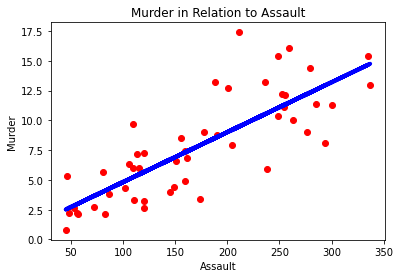

In [28]:
plt.scatter(x1M, yM, c='red')
yhat = 0.0419 * x1M + 0.6317
fig = plt.plot(x1M, yhat, lw=4, c='blue', label='Regression Line')
plt.title('Murder in Relation to Assault')
plt.xlabel('Assault')
plt.ylabel('Murder')
plt.show()

## An IDEA!



I started thinking about what else would influence the crime rates and thought that the unemployment rate might be a good indication of whether crimes would increase or not.

The unemployment rate isn't included in this dataset, so I found another dataset on Kaggle that had the unemployment rate per state for the year 1977 and attached it to this one. 

### Here we are importing the unemployment data that we got from another dataset on Kaggle

In [29]:
# create a new variable from another dataframe with the unemployment data
unemployment = pd.read_csv('unemployment 1977.csv')
unemployment.head()

,Unnamed: 0,unemployment
0,1,7.325
1,40,9.875
2,79,8.208
3,118,6.475
4,157,8.350


In [30]:
# drop the 'Unnamed:0' column
unemployment = unemployment.drop(['Unnamed: 0'], axis=1)
unemployment.head()

,unemployment
0,7.325
1,9.875
2,8.208
3,6.475
4,8.350


In [31]:
# add the new column to the original dataframe
df['Unemployment'] = unemployment
df.head()

,State,Murder,Assault,UrbanPop,Rape,Unemployment
0,Alabama,13.2,236,58,21.2,7.325
1,Alaska,10.0,263,48,44.5,9.875
2,Arizona,8.1,294,80,31.0,8.208
3,Arkansas,8.8,190,50,19.5,6.475
4,California,9.0,276,91,40.6,8.350


### Analyze the new variable 'Unemployment'

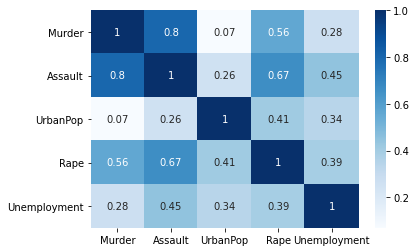

In [32]:
sns.heatmap(df.corr(), annot=True,cmap="Blues");

Here we can see that Unemployment doesn't seem to have any significant correlation between any of the other crime rates except Assault, which comes in at a 0.45 correlation coefficient.  

### Unemployment/Assault Regression

In [33]:
yA = df['Assault']  # dependant variable
xU = df['Unemployment']   # independant variable

In [34]:
xUnemployment= sm.add_constant(xU)
results = sm.OLS(yA,xUnemployment).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Assault   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     12.23
Date:                Sun, 10 Oct 2021   Prob (F-statistic):            0.00103
Time:                        11:16:44   Log-Likelihood:                -285.91
No. Observations:                  50   AIC:                             575.8
Df Residuals:                      48   BIC:                             579.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           15.5220     45.653      0.340      0.735     -76.269     107.313
Unemployment    23.6464      6.763      3.497      0.001      10.049      37.244
==============================================================================
Omnibus:                        0.355   Durbin-Watson:                   2.268
Prob(Omnibus):                  0.837   Jarque-Bera (JB):                0.528
Skew:                           0.086   Prob(JB):                        0.768
Kurtosis:                       2.527   Cond. No.                         29.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

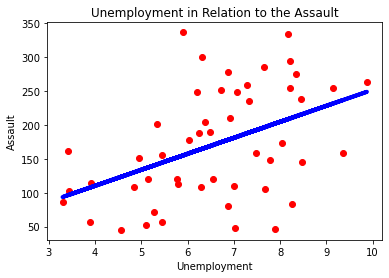

In [35]:
plt.scatter(xU, yA, c='red')
yhat = 23.6464 * xU + 15.5220
fig = plt.plot(xU, yhat, lw=4, c='blue', label='Regression Line')
plt.title('Unemployment in Relation to the Assault')
plt.xlabel('Unemployment')
plt.ylabel('Assault')
plt.show()

## Mulitple Regression

Here I want to see if we combine mulitple variables if that yeilds more predictive power

In [36]:
# create a new dataframe 
df4 = df.copy()

In [37]:
# drop the state column from the new dataframe 
df4 = df4.drop(['State'], axis=1)
df4.head()

,Murder,Assault,UrbanPop,Rape,Unemployment
0,13.2,236,58,21.2,7.325
1,10.0,263,48,44.5,9.875
2,8.1,294,80,31.0,8.208
3,8.8,190,50,19.5,6.475
4,9.0,276,91,40.6,8.350


Let's see if we make rape our target variable 

In [38]:
y1 = df4['Rape']
x2 = df4[['Murder','Assault','UrbanPop','Unemployment']]

In [39]:
xC = sm.add_constant(x2)
results = sm.OLS(y1,x2).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   Rape   R-squared (uncentered):                   0.922
Model:                            OLS   Adj. R-squared (uncentered):              0.915
Method:                 Least Squares   F-statistic:                              136.3
Date:                Sun, 10 Oct 2021   Prob (F-statistic):                    6.95e-25
Time:                        11:16:44   Log-Likelihood:                         -164.25
No. Observations:                  50   AIC:                                      336.5
Df Residuals:                      46   BIC:                                      344.2
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Murder           0.3637      0.368      0.988      0.328      -0.377       1.105
Assault          0.0490      0.021      2.327      0.024       0.007       0.091
UrbanPop         0.1421      0.056      2.520      0.015       0.029       0.256
Unemployment     0.1275      0.617      0.207      0.837      -1.115       1.370
==============================================================================
Omnibus:                        9.682   Durbin-Watson:                   1.876
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                9.958
Skew:                           0.782   Prob(JB):                      0.00688
Kurtosis:                       4.527   Cond. No.                         130.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
df.to_csv('US Violent Crime by State 1977', index=False)

In [41]:
df.head(15)

,State,Murder,Assault,UrbanPop,Rape,Unemployment
0,Alabama,13.2,236,58,21.2,7.325
1,Alaska,10.0,263,48,44.5,9.875
2,Arizona,8.1,294,80,31.0,8.208
3,Arkansas,8.8,190,50,19.5,6.475
4,California,9.0,276,91,40.6,8.350
5,Colorado,7.9,204,78,38.7,6.367
6,Connecticut,3.3,110,77,11.1,7.000
7,Delaware,5.9,238,72,15.8,8.458
8,Florida,15.4,335,80,31.9,8.175
9,Georgia,17.4,211,60,25.8,6.908
